In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse

sys.path.append('../')
import utils
import settings
plt.style.use('../spectrum.mplstyle')

In [2]:
#data and settings
#{label:[m_pi value, m_pi error,m_\Delta value, m_\Delta error, plot index],...} (MeV) #mpi err 2.6
mdelta_data = {"Andersen et al. 2018":[280,0.0,1344,20,1],"Silvi et al. 2021":[255.4,1.6,1380,11.4,3],"This work":[206.3,2.5,1290,16,0]}
mdelta_physical_point = [139.5704,0.002,1232,2,2]

g_data = {"Andersen et al. 2018":[280,0.0,37.1,9.2,1],"Silvi et al. 2021":[255.4,1.6,23.8,2.8,3],"This work":[206.3,2.5,24.995,0.946,0]}
g_physical_point = [139.5704,0.002,28.6,0.3,2]

In [3]:
# #additional plot for fernando:
# mdelta_data = {"Andersen et al. 2018":[280,0.0,1344,20,1],"Silvi et al. 2021":[255.4,1.6,1380,11.4,3],"Alexandrou et al. 2021":[139.43,0.0,1255,25,4],"This work":[206.3,2.5,1290,16,0]}
# # mdelta_data["Alexandrou et al. 2021"] = [139.43,0.0,1255,25,4]
# g_data = {"Andersen et al. 2018":[280,0.0,37.1,9.2,1],"Silvi et al. 2021":[255.4,1.6,23.8,2.8,3],"Alexandrou et al. 2021":[139.43,0.0,36,31,4],"This work":[206.3,2.5,24.995,0.946,0]}
# # g_data["Alexandrou et al. 2021"] = [139.43,0.0,36,31,4]

In [4]:
mpis = [np.floor(mdelta_data[label][0]) for label in mdelta_data.keys()]
mpis.append(np.floor(mdelta_physical_point[0]))

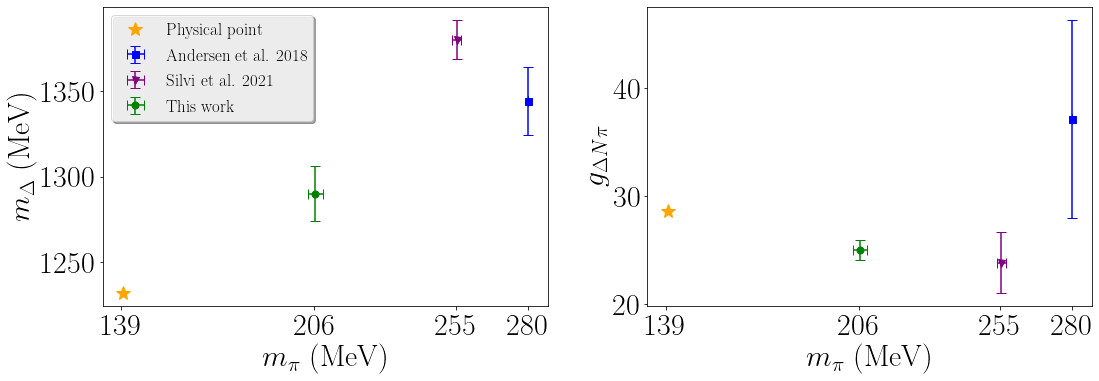

In [5]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)

plt.subplot(1, 2, 1)
plt.plot(mdelta_physical_point[0],mdelta_physical_point[2], color=settings.colors[mdelta_physical_point[4]],lw=0.0, marker="*", label="Physical point",markersize=15)

for label in mdelta_data.keys():
    plt.errorbar(x=mdelta_data[label][0],xerr=mdelta_data[label][1],y=mdelta_data[label][2],yerr=mdelta_data[label][3],capsize=5, color=settings.colors[mdelta_data[label][4]], marker=settings.markers[mdelta_data[label][4]], linewidth=0.0, elinewidth=1.5,label=label,markersize=7)
    
plt.xticks(ticks=list(set(mpis)))
plt.xlabel(r"$m_\pi$ (MeV)")
plt.ylabel(r"$m_\Delta$ (MeV)")
plt.legend(loc="upper left")

plt.subplot(1, 2, 2)

plt.plot(g_physical_point[0],g_physical_point[2], color=settings.colors[g_physical_point[4]],lw=0.0, marker="*", label="Physical point",markersize=15)

for label in g_data.keys():
    plt.errorbar(x=g_data[label][0],xerr=g_data[label][1],y=g_data[label][2],yerr=g_data[label][3],capsize=5, color=settings.colors[g_data[label][4]], marker=settings.markers[g_data[label][4]], linewidth=0.0, elinewidth=1.5,label=label,markersize=7)
    
plt.xticks(ticks=list(set(mpis)))
plt.xlabel(r"$m_\pi$ (MeV)")
plt.ylabel(r"$g_{\Delta N\pi}$")
# plt.legend(loc="upper left")

plt.tight_layout()
plt.savefig("m_delta.pdf")


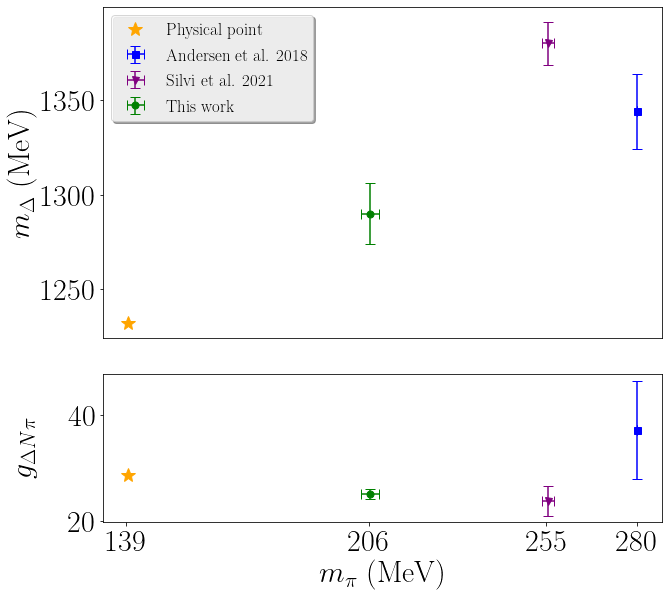

In [6]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(9)

plt.subplot(3, 1, (1,2))
plt.plot(mdelta_physical_point[0],mdelta_physical_point[2], color=settings.colors[mdelta_physical_point[4]],lw=0.0, marker="*", label="Physical point",markersize=15)

for label in mdelta_data.keys():
    plt.errorbar(x=mdelta_data[label][0],xerr=mdelta_data[label][1],y=mdelta_data[label][2],yerr=mdelta_data[label][3],capsize=5, color=settings.colors[mdelta_data[label][4]], marker=settings.markers[mdelta_data[label][4]],linestyle="", linewidth=0.0, elinewidth=1.5,label=label,markersize=7)
    
    
# plt.xlabel(r"$m_\pi$ (MeV)")
plt.xticks(ticks=[],labels=[])
plt.ylabel(r"$m_\Delta$ (MeV)")
plt.legend(loc="upper left")

plt.subplot(3, 1, 3)

plt.plot(g_physical_point[0],g_physical_point[2], color=settings.colors[g_physical_point[4]],lw=0.0, marker="*", label="Physical point",markersize=15)

for label in g_data.keys():
    plt.errorbar(x=g_data[label][0],xerr=g_data[label][1],y=g_data[label][2],yerr=g_data[label][3],capsize=5, color=settings.colors[g_data[label][4]], marker=settings.markers[g_data[label][4]], linewidth=0.0, elinewidth=1.5,label=label,markersize=7)
    

plt.xticks(ticks=list(set(mpis)))

plt.xlabel(r"$m_\pi$ (MeV)")
plt.ylabel(r"$g_{\Delta N\pi}$")
# plt.legend(loc="upper left")

f.align_ylabels()
plt.tight_layout()
plt.savefig("m_delta2.pdf")
